# Case 1: Text Classification

Name: Felicia Ferren

NIM: 2440013071

Video link: https://youtu.be/hmTLtPRIBVs

### **Import Google Drive to colab**

 The data will be accessed from here.

In [ ]:
# import drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# view files
! ls

drive  sample_data


In [ ]:
# setting project directory
%cd drive/My Drive/uas-text-mining

/content/drive/My Drive/uas-text-mining


now, we have our project directory under ../content/drive/My Drive/uas-text-mining...

## Load Data

Now, we load the data 'data_1B.csv' and let's see what's in there...

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read data
df = pd.read_csv('data_1B.csv')

df.head(5)

,Unnamed: 0,text,label
0,0,AV2 Women Maternity Wear/Feedind/Nursing Top &...,Clothing & Accessories
1,1,Houskipper Professional Spray Mop with Best 36...,Household
2,2,"Tat-Sat Ceramic Fondue Burner , Black This Fon...",Household
3,3,"Prestige Plastic Hand Blender, Orange Save tim...",Household
4,4,Gorilla Renesa+ Energy Saving 5 Star Rated Cei...,Household


we can see here that maybe this Unnamed: 0 field is just the index of our observations, so we can just remove them.

In [ ]:
# drop out the first field, we will only take text and label field
df1 = df.iloc[:, 1:].copy()

df1.head(5)

,text,label
0,AV2 Women Maternity Wear/Feedind/Nursing Top &...,Clothing & Accessories
1,Houskipper Professional Spray Mop with Best 36...,Household
2,"Tat-Sat Ceramic Fondue Burner , Black This Fon...",Household
3,"Prestige Plastic Hand Blender, Orange Save tim...",Household
4,Gorilla Renesa+ Energy Saving 5 Star Rated Cei...,Household


now, we have a dataframe with 2 variables, which are 'text' and 'label'. The 'text' is the sentences and they are classified into a label in 'label' field. Let's find out more in EDA!

## Exploratory Data Analysis


Now, we will gather more information about our dataset in this section.

In [ ]:
# view shape
df1.shape

(12606, 2)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12606 entries, 0 to 12605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12606 non-null  object
 1   label   12606 non-null  object
dtypes: object(2)
memory usage: 197.1+ KB


Here, we can tell that there are 12606 observations in our dataset where there is likely no NULL values.

Now, we will check the count of the text's label and see the distributions.

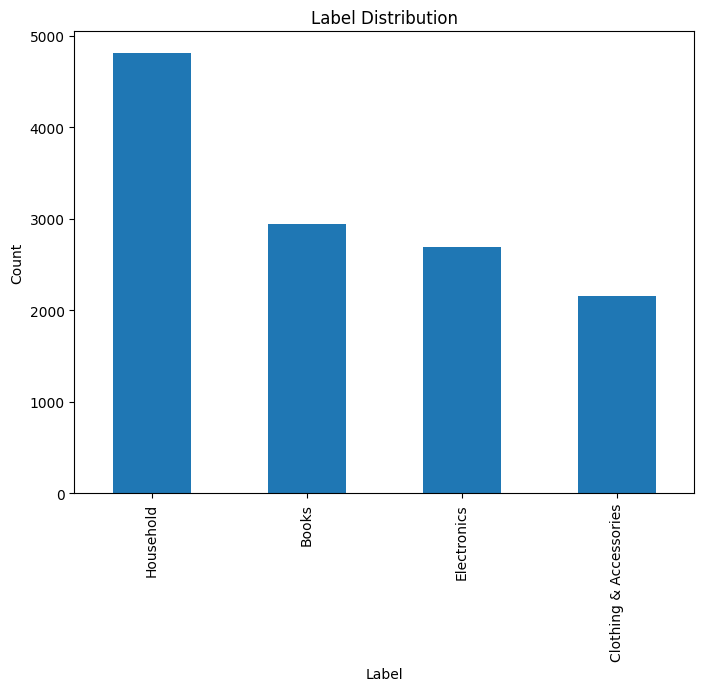

In [ ]:
# check the count of text label
label_counts = df1['label'].value_counts()

# plot into bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# see the distribution of the text label in numbers
label_counts

Household                 4810
Books                     2946
Electronics               2693
Clothing & Accessories    2157
Name: label, dtype: int64

We can see here that the class is imbalanced, where most texts classified as 'Household' (around 40%, while the other are around 20%).

Hence, we will use this information later for modeling.

Now, let's see several samples of records..

In [ ]:
# preview several samples of records
print('Text: \n', df1['text'].iloc[500])
print('Label: \n', df1['label'].iloc[500])
print('\n')
print('Text: \n', df1['text'].iloc[5000])
print('Label: \n', df1['label'].iloc[5000])

Text: 
 Alexvyan Universal World Travel Power Plug, European Adapter, AC Outlet Plugs for All Countries (White) - Pack of 2 Size name:Pack of 2   Stop carrying multiple adapters and make travelling convenient with this SmartPro all-in-one world travel adapter. Compact and a lightweight, this power adapter makes a perfect travel companion wherever you go. It is compatible with Australian, UK, Spain, US, and Japanese style plugs, making it one of the most useful and versatile plug adapters. In short, it is designed to suit the power plugs used in over 150 different countries, so you just don’t need to worry about connectivity issues when you travel abroad. This travel adapter also has a built-in surge protector to prevent power fluctuations from harming your charging gadgets. The child protection safety shutter incorporated in this adapter comes in handy in places where the power outlets are within the reach of kids. Its power indicator light lets you know if the plug is turned on/off an

We can see here that we might need some cleaning, such as making the characters into lowercase, remover punctuations, etc. This will be done in the next process, pre-processing process.

## Pre-processing process

In the pre-processing process, we will do data cleansing to remove possible URLs, punctuatons, and convert the texts into lowercase format. Then, we will do tokenization to make the each text is seperated into each word. We also remove stopwords and do lemmatization to the text to help our model in determining the correct class.

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

In [ ]:
# define pre-processing functions
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # remove URLs
    text = text.translate(str.maketrans("", "", string.punctuation)) # remove punctuation
    text = text.lower() #convert to lowercase

    # tokenization
    tokens = nltk.word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens] # also remove gerund or +ing into verb (base word)

    return tokens


In [ ]:
# apply the pre-processing process into the text data
df1['clean_text'] = df1['text'].apply(preprocess_text)

Now, we have the cleaned text. Let's take several sample and see the results!

In [ ]:
# see the before and adter cleaning, along with the label
print('Text: \n', df1['text'].iloc[500])
print('Cleaned Text: \n', " ".join(df1['clean_text'].iloc[500])) # join so it will not in tokens format
print('Label: \n', df1['label'].iloc[500])
print('\n')
print('Text: \n', df1['text'].iloc[5000])
print('Cleaned Text: \n', " ".join(df1['clean_text'].iloc[5000])) # join so it will not in tokens format
print('Label: \n', df1['label'].iloc[5000])

Text: 
 Alexvyan Universal World Travel Power Plug, European Adapter, AC Outlet Plugs for All Countries (White) - Pack of 2 Size name:Pack of 2   Stop carrying multiple adapters and make travelling convenient with this SmartPro all-in-one world travel adapter. Compact and a lightweight, this power adapter makes a perfect travel companion wherever you go. It is compatible with Australian, UK, Spain, US, and Japanese style plugs, making it one of the most useful and versatile plug adapters. In short, it is designed to suit the power plugs used in over 150 different countries, so you just don’t need to worry about connectivity issues when you travel abroad. This travel adapter also has a built-in surge protector to prevent power fluctuations from harming your charging gadgets. The child protection safety shutter incorporated in this adapter comes in handy in places where the power outlets are within the reach of kids. Its power indicator light lets you know if the plug is turned on/off an

We can tell that the text is cleaned, by seeing all lowercased characters, no punctuations, and each word is a lemma.

### Data Splitting

After doing the pre-processing process, we will do the data spliting. Our data is quite imbalanced, so we will do stratified sampling according to the label field. The data will be splitted into train and test data with 80:20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets while maintaining class distribution -> using stratified sampling
X = df1['text']
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print(y_train.value_counts())
print("\n Train size: ", y_train.count())

Household                 3848
Books                     2357
Electronics               2154
Clothing & Accessories    1725
Name: label, dtype: int64

 Train size:  10084


In [ ]:
print(y_test.value_counts())

print("\n Test size: ", y_test.count())

Household                 962
Books                     589
Electronics               539
Clothing & Accessories    432
Name: label, dtype: int64

 Test size:  2522


Now, the data is splitted and we have balanced splitted data.

## Vectorization

This time, we will be using two vectorizer, namely Count Vectorizer (Bag-of-Words) and TF-IDF Vectorizer.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# vectorization using Bag-of-Words (BoW)
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

In [ ]:
# vectorization using TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

## Modelling

In this part, we will try two different classifier, namely Naive Bayes and Support Vector Machine (SVM).

Because we have done two vectorization process, we will apply each result to the modelling process. At the end, there will be four models.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
# Naive Bayes - BoW
nb_model_bow = MultinomialNB() # define the classifier
nb_model_bow.fit(X_train_bow, y_train) # fit into train data
nb_bow_predictions = nb_model_bow.predict(X_test_bow) # predict

# Naive Bayes - TFIDF
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)
nb_tfidf_predictions = nb_model_tfidf.predict(X_test_tfidf)

In [ ]:
# SVM - BoW
svm_model_bow = SVC()
svm_model_bow.fit(X_train_bow, y_train)
svm_bow_predictions = svm_model_bow.predict(X_test_bow)

# SVM - TFIDF
svm_model_tfidf = SVC()
svm_model_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_predictions = svm_model_tfidf.predict(X_test_tfidf)

## Model Evaluation

Now, we will evaluate our model by using several metrics such as accuracy, precision, recall, f1, and confusion matrix. For the confusion_matrix, we will also try seeing it using heat map for getting a better interpretation.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
def model_evaluation(pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
    f1_scores = f1_score(y_test, pred, average=None)
    conf_matrix = confusion_matrix(y_test, pred)

    return accuracy, precision, recall, f1, f1_scores, conf_matrix

def print_evaluation_result(pred):
    accuracy, precision, recall, f1, f1_scores, conf_matrix = model_evaluation(pred)
    print("Accuracy: ", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    for i, f1 in enumerate(f1_scores):
      print(f'F1-score for class {i}: {f1}')
    print("Micro F1-score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n\n")

    print("HeatMap for Confusion Matrix:")
    # create heatmap from confusion matrix
    unique_labels = sorted(set(y_test) | set(pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

    # set labels, title, and axis ticks
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.xticks(ticks=range(len(unique_labels)), labels=unique_labels)
    plt.yticks(ticks=range(len(unique_labels)), labels=unique_labels)

    # show plot
    plt.show()


Accuracy:  0.9536082474226805
Precision: 0.9536082474226805
Recall: 0.9536082474226805
F1-score for class 0: 0.9510729613733906
F1-score for class 1: 0.9652777777777778
F1-score for class 2: 0.9428303655107778
F1-score for class 3: 0.9558521560574949
Micro F1-score: 0.9558521560574949
Confusion Matrix:
 [[554   8   5  22]
 [  5 417   1   9]
 [ 10   2 503  24]
 [  7   5  19 931]]



HeatMap for Confusion Matrix:


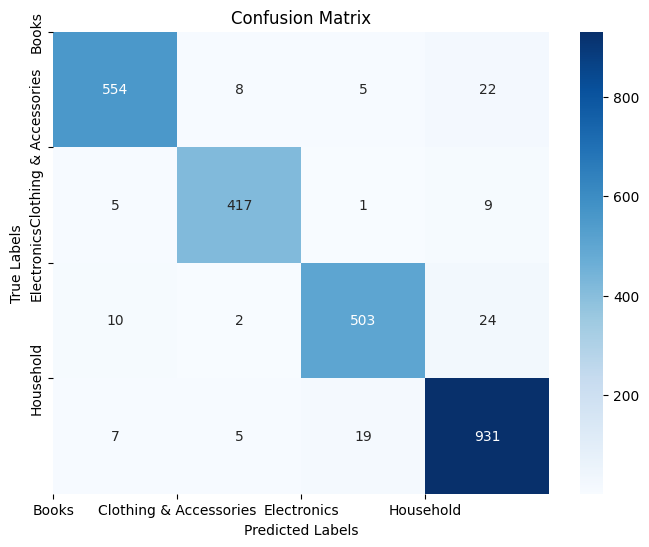

In [ ]:
# Model 1: Naive Bayes - Bag-of-Words
print_evaluation_result(nb_bow_predictions)

Accuracy:  0.9214908802537668
Precision: 0.9214908802537668
Recall: 0.9214908802537668
F1-score for class 0: 0.9469103568320277
F1-score for class 1: 0.9221260815822003
F1-score for class 2: 0.909452736318408
F1-score for class 3: 0.913022585295531
Micro F1-score: 0.913022585295531
Confusion Matrix:
 [[544   3   2  40]
 [  2 373   2  55]
 [  8   0 457  74]
 [  6   1   5 950]]



HeatMap for Confusion Matrix:


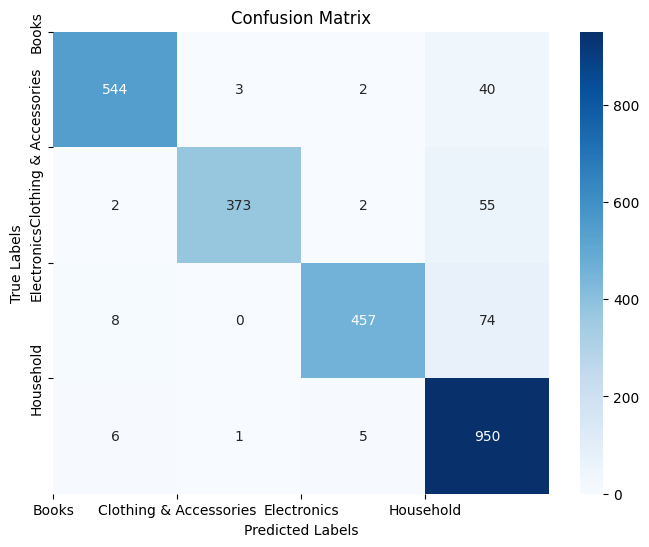

In [ ]:
# Model 2: Naive Bayes - TF-IDF
print_evaluation_result(nb_tfidf_predictions)

Accuracy:  0.9024583663758922
Precision: 0.9024583663758922
Recall: 0.9024583663758922
F1-score for class 0: 0.8738317757009345
F1-score for class 1: 0.9084249084249085
F1-score for class 2: 0.8953140578265204
F1-score for class 3: 0.9226006191950464
Micro F1-score: 0.9226006191950464
Confusion Matrix:
 [[561   5   5  18]
 [ 36 372   1  23]
 [ 46   3 449  41]
 [ 52   7   9 894]]



HeatMap for Confusion Matrix:


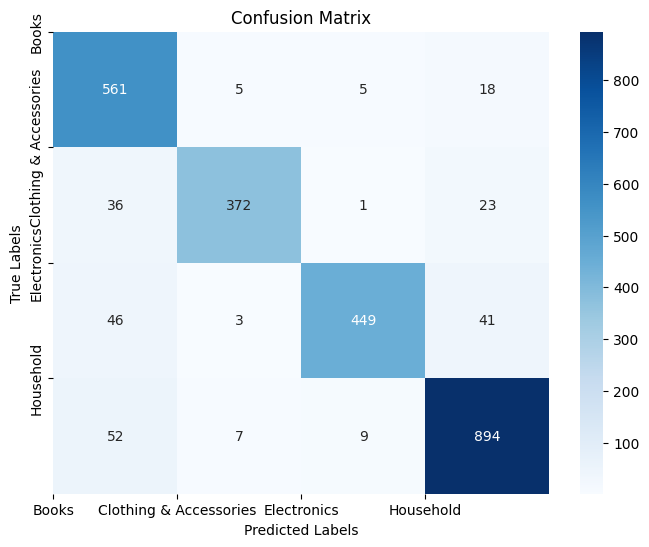

In [ ]:
# Model 3: Support Vector Machine - Bag-of-Words
print_evaluation_result(svm_bow_predictions)

Accuracy:  0.9623314829500397
Precision: 0.9623314829500397
Recall: 0.9623314829500397
F1-score for class 0: 0.9563729683490162
F1-score for class 1: 0.9695550351288057
F1-score for class 2: 0.960377358490566
F1-score for class 3: 0.9637939826619072
Micro F1-score: 0.9637939826619072
Confusion Matrix:
 [[559   4   4  22]
 [  5 414   1  12]
 [  8   2 509  20]
 [  8   2   7 945]]



HeatMap for Confusion Matrix:


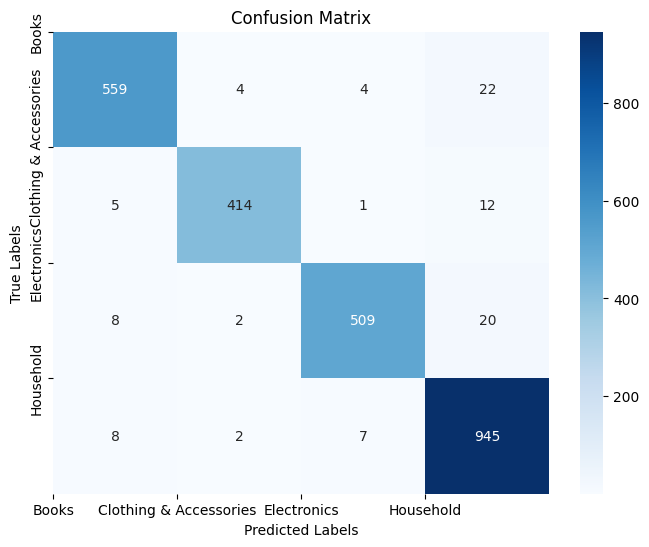

In [ ]:
# Model 3: Support Vector Machine - TF-IDF
print_evaluation_result(svm_tfidf_predictions)

## Summary

In this summary, we will compare the evaluation results among four models and report several insights to you.

1. When **using Naive Bayes Classifier**, we can see better result when using **Count Vectorizer (model 1)** than using TF-IDF (model 2).
2. When **using Support Vector Machine Classifier**, we can see better result when using **TF-IDF Vectorizer (model 4)** than using Count Vectorizer (model 3).
3. Overall, the **best model** is taken from using **Support Vector Machine Classifier along with TF-IDF Vectorizer (model 4)**.
4. **All of the models** can predict each class very well.